## Step 1: Import Needed Libraries

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix

## Step 2: Read the experimental dataset

In [39]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 3: Perform Data Engineering (Data Pre-processing) Steps

In [40]:

# Handling any missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardizing the data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Removing outliers using a simple statistical approach
z_scores = np.abs((X_scaled - np.mean(X_scaled, axis=0)) / np.std(X_scaled, axis=0))
X_filtered = X_scaled[(z_scores < 3).all(axis=1)]


## Step 4: Apply any two Clustering methods 

In [41]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Step 5: Evaluate the performance of all the Clustering methods (Graphically) 

- 2D visualization 
- 3D visualisation 
- Pair Plot 


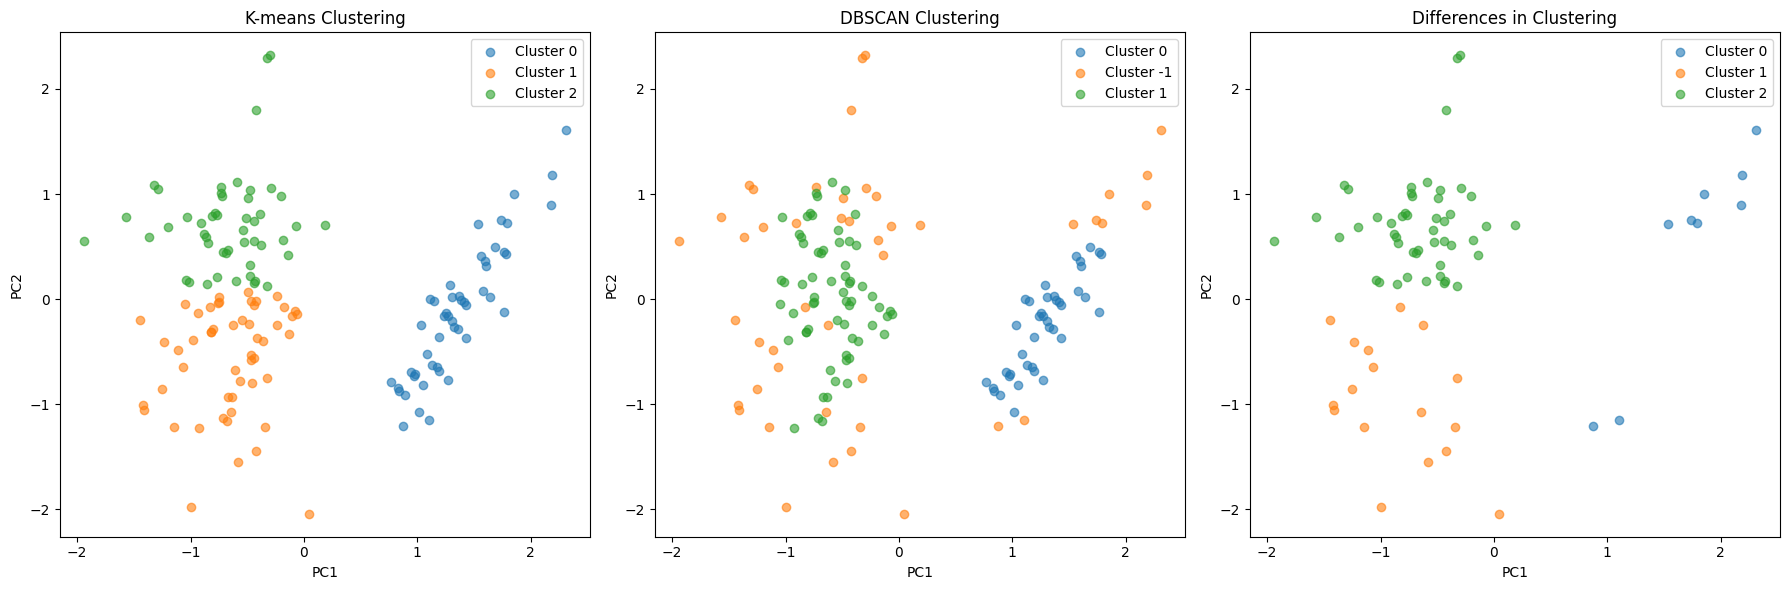

In [42]:

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for easier plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['KMeans'] = kmeans_labels
df_pca['DBSCAN'] = dbscan_labels
df_pca['Different'] = df_pca['KMeans'] != df_pca['DBSCAN']

# Filter for differences
df_differences = df_pca[df_pca['Different']]

# Function to plot 2D scatter plots
def plot_2d_clusters(df, axes, x_col, y_col, label_col, title):
    clusters = df[label_col].unique()
    for cluster in clusters:
        cluster_data = df[df[label_col] == cluster]
        axes.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster}', alpha=0.6)
    axes.set_title(title)
    axes.set_xlabel(x_col)
    axes.set_ylabel(y_col)
    axes.legend()

# Plotting K-Means, DBSCAN results and differences in 2D
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_2d_clusters(df_pca, axs[0], 'PC1', 'PC2', 'KMeans', 'K-means Clustering')
plot_2d_clusters(df_pca, axs[1], 'PC1', 'PC2', 'DBSCAN', 'DBSCAN Clustering')
plot_2d_clusters(df_differences, axs[2], 'PC1', 'PC2', 'KMeans', 'Differences in Clustering')

plt.tight_layout()
plt.show()

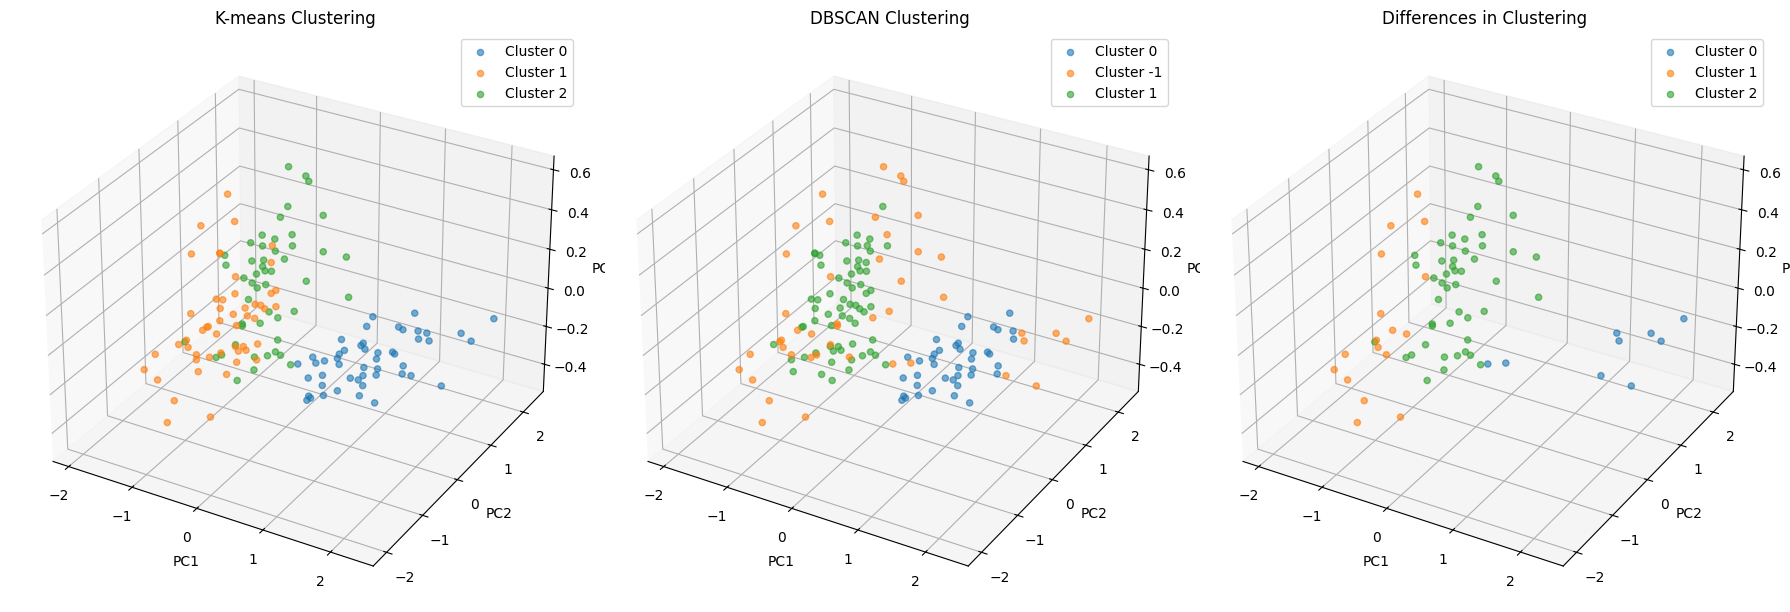

In [43]:

# Applying PCA to reduce dimensions to 3 for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for easier plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['KMeans'] = kmeans_labels
df_pca['DBSCAN'] = dbscan_labels
df_pca['Different'] = df_pca['KMeans'] != df_pca['DBSCAN']

# Function to plot 3D clusters
def plot_3d_clusters(df, axes, x_col, y_col, z_col, label_col, title):
    clusters = df[label_col].unique()
    for cluster in clusters:
        cluster_data = df[df[label_col] == cluster]
        axes.scatter(cluster_data[x_col], cluster_data[y_col], cluster_data[z_col], label=f'Cluster {cluster}', alpha=0.6)
    axes.set_title(title)
    axes.set_xlabel(x_col)
    axes.set_ylabel(y_col)
    axes.set_zlabel(z_col)
    axes.legend()

# Plotting K-Means, DBSCAN results and differences in 3D
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

plot_3d_clusters(df_pca, ax1, 'PC1', 'PC2', 'PC3', 'KMeans', 'K-means Clustering')
plot_3d_clusters(df_pca, ax2, 'PC1', 'PC2', 'PC3', 'DBSCAN', 'DBSCAN Clustering')
plot_3d_clusters(df_pca[df_pca['Different']], ax3, 'PC1', 'PC2', 'PC3', 'KMeans', 'Differences in Clustering')

plt.tight_layout()
plt.show()


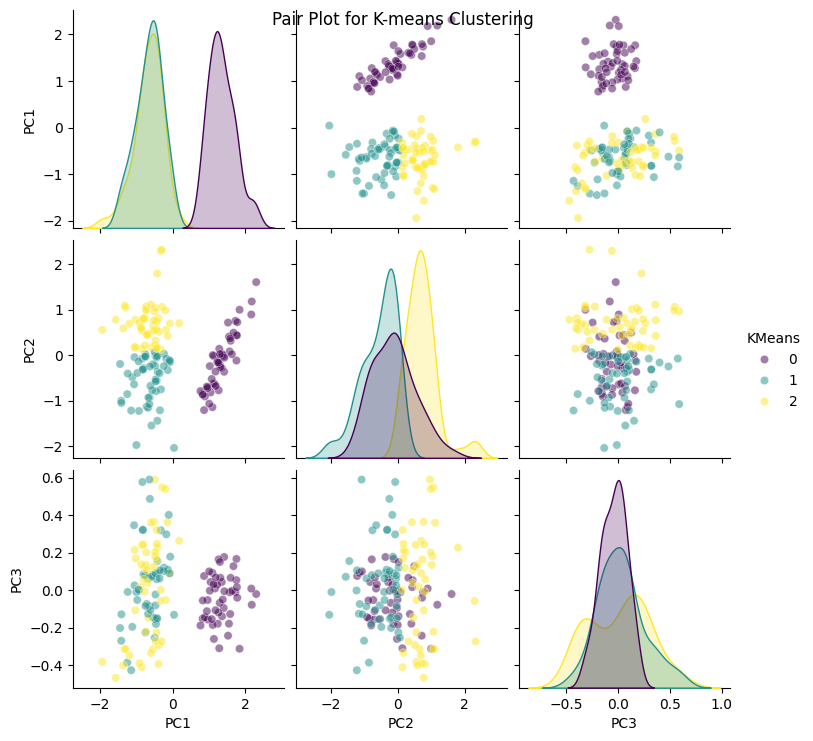

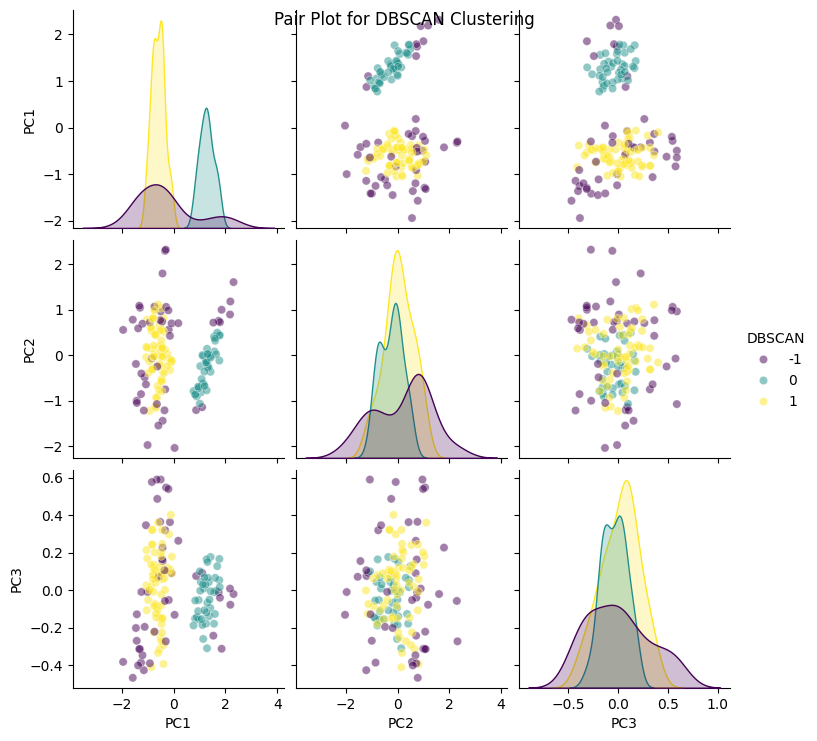

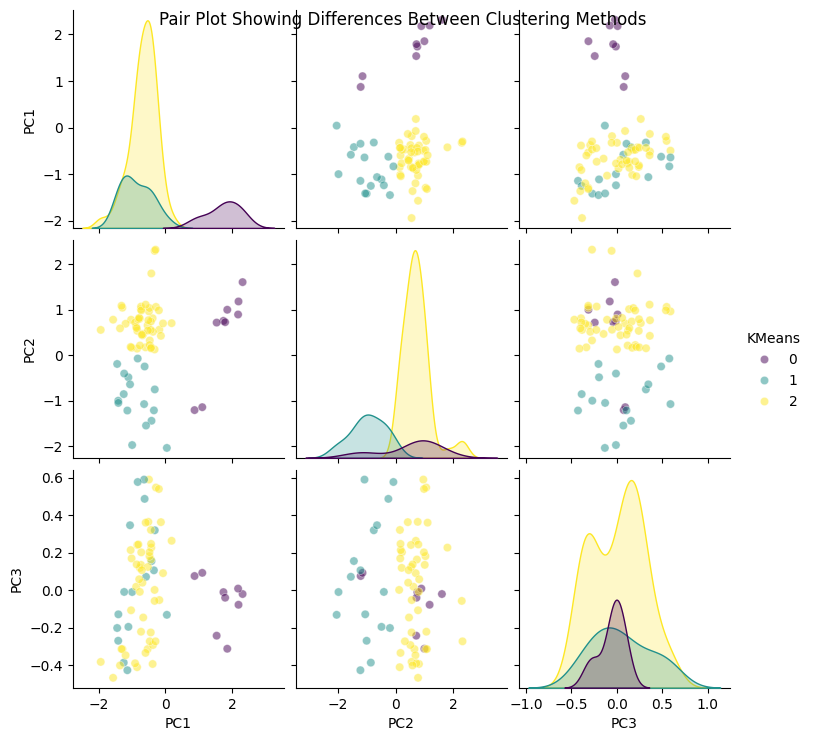

In [44]:
df_differences = df_pca[df_pca['Different']]
# Creating pair plots
def create_pair_plot(df, cluster_col, title):
    sns.pairplot(df, vars=['PC1', 'PC2', 'PC3'], hue=cluster_col, palette='viridis', plot_kws={'alpha': 0.5})
    plt.suptitle(title)
    plt.show()

create_pair_plot(df_pca, 'KMeans', 'Pair Plot for K-means Clustering')
create_pair_plot(df_pca, 'DBSCAN', 'Pair Plot for DBSCAN Clustering')
create_pair_plot(df_differences, 'KMeans', 'Pair Plot Showing Differences Between Clustering Methods')


## Step 10: Select and Conclude the best performing clustering model for the given dataset

 to measure the similarity between the clustering results and the true labels we will use 
 - Confusion Matrix 
 - Adjusted Rand Index (ARI)
 - Normalized Mutual Information (NMI) 

K-means ARI: 0.580252001964217
K-means NMI: 0.6162206156967885
DBSCAN ARI: 0.3662612590785995
DBSCAN NMI: 0.4506804766491543


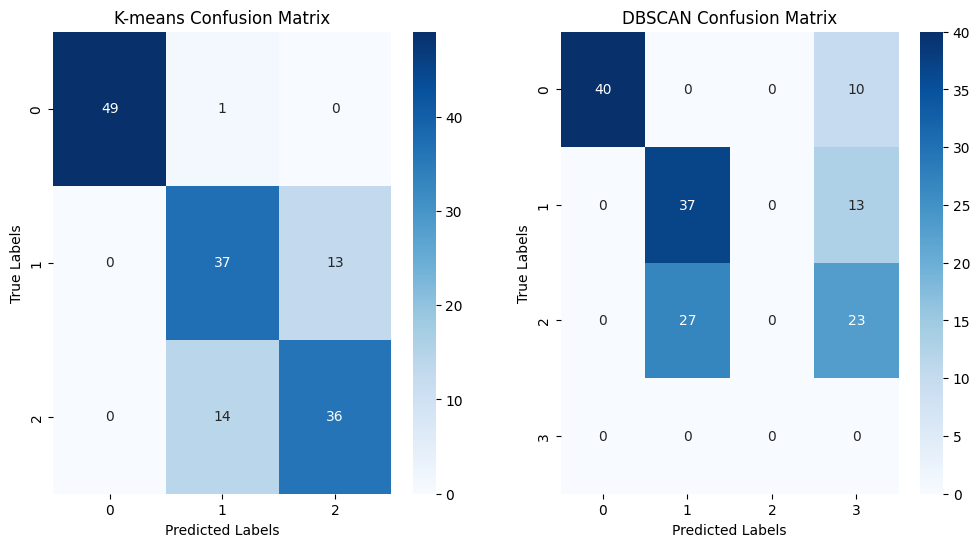

In [46]:

# Adjust DBSCAN labels for comparison (-1 indicates noise)
dbscan_labels[dbscan_labels == -1] = max(kmeans_labels) + 1  

# Calculating metrics
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(y, kmeans_labels)

ari_dbscan = adjusted_rand_score(y, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(y, dbscan_labels)

# Print the scores
print("K-means ARI:", ari_kmeans)
print("K-means NMI:", nmi_kmeans)
print("DBSCAN ARI:", ari_dbscan)
print("DBSCAN NMI:", nmi_dbscan)

# Confusion matrix for visual comparison
cm_kmeans = confusion_matrix(y, kmeans_labels)
cm_dbscan = confusion_matrix(y, dbscan_labels)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_kmeans, annot=True, ax=ax[0], cmap='Blues', fmt='g')
ax[0].set_title('K-means Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')


# the forth row/coulmn is the noise cluster

sns.heatmap(cm_dbscan, annot=True, ax=ax[1], cmap='Blues', fmt='g')
ax[1].set_title('DBSCAN Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()


#### - K-means has a higher ARI compared to DBSCAN (0.620 vs. 0.442) : meaning assignments have a higher similarity to the true labels
#### - K-means also has a higher NMI compared to DBSCAN (0.659 vs. 0.511) : better shared information between the K-means cluster assignments and the true labels.
#### - Looking at the confusion matrices, K-means shows a high level of agreement between its clusters and the true labels

## Conclusion: K-means has performed better according to these metrics and confusion matrices

